In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from matplotlib.colors import LogNorm
from featurizers.morgan import ECFP6
from sklearn.decomposition import PCA

In [2]:
# dataset and featurization
qm9 = pd.read_csv('data/qm9.csv') # qm9 dataset
qm9['gap'] = qm9['gap']*27.2114
feat = pd.read_csv('data/morgan/qm9_ECFP6.csv') # morgan fingerprints

# col names
prop_cols = ['A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap',
       'r2', 'zpve', 'u0', 'u298', 'h298', 'g298', 'cv', 'u0_atom',
       'u298_atom', 'h298_atom', 'g298_atom']
feat_cols = [f'bit{i}' for i in range(2048)]

# combine features with dataset
for col in prop_cols:
    feat[col] = qm9[col]

# PCA 
pca = PCA(n_components=2)
feat_pca = pca.fit_transform(feat[feat_cols])
feat['PCA 1'], feat['PCA 2']  = feat_pca[:,0], feat_pca[:,1]

<Figure size 432x288 with 0 Axes>

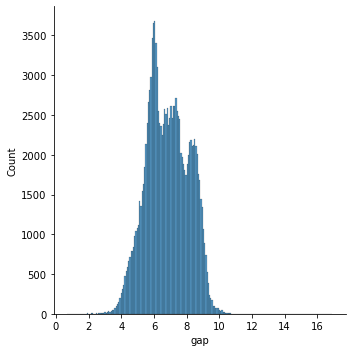

In [3]:
plt.figure()
sns.displot(feat['gap'])

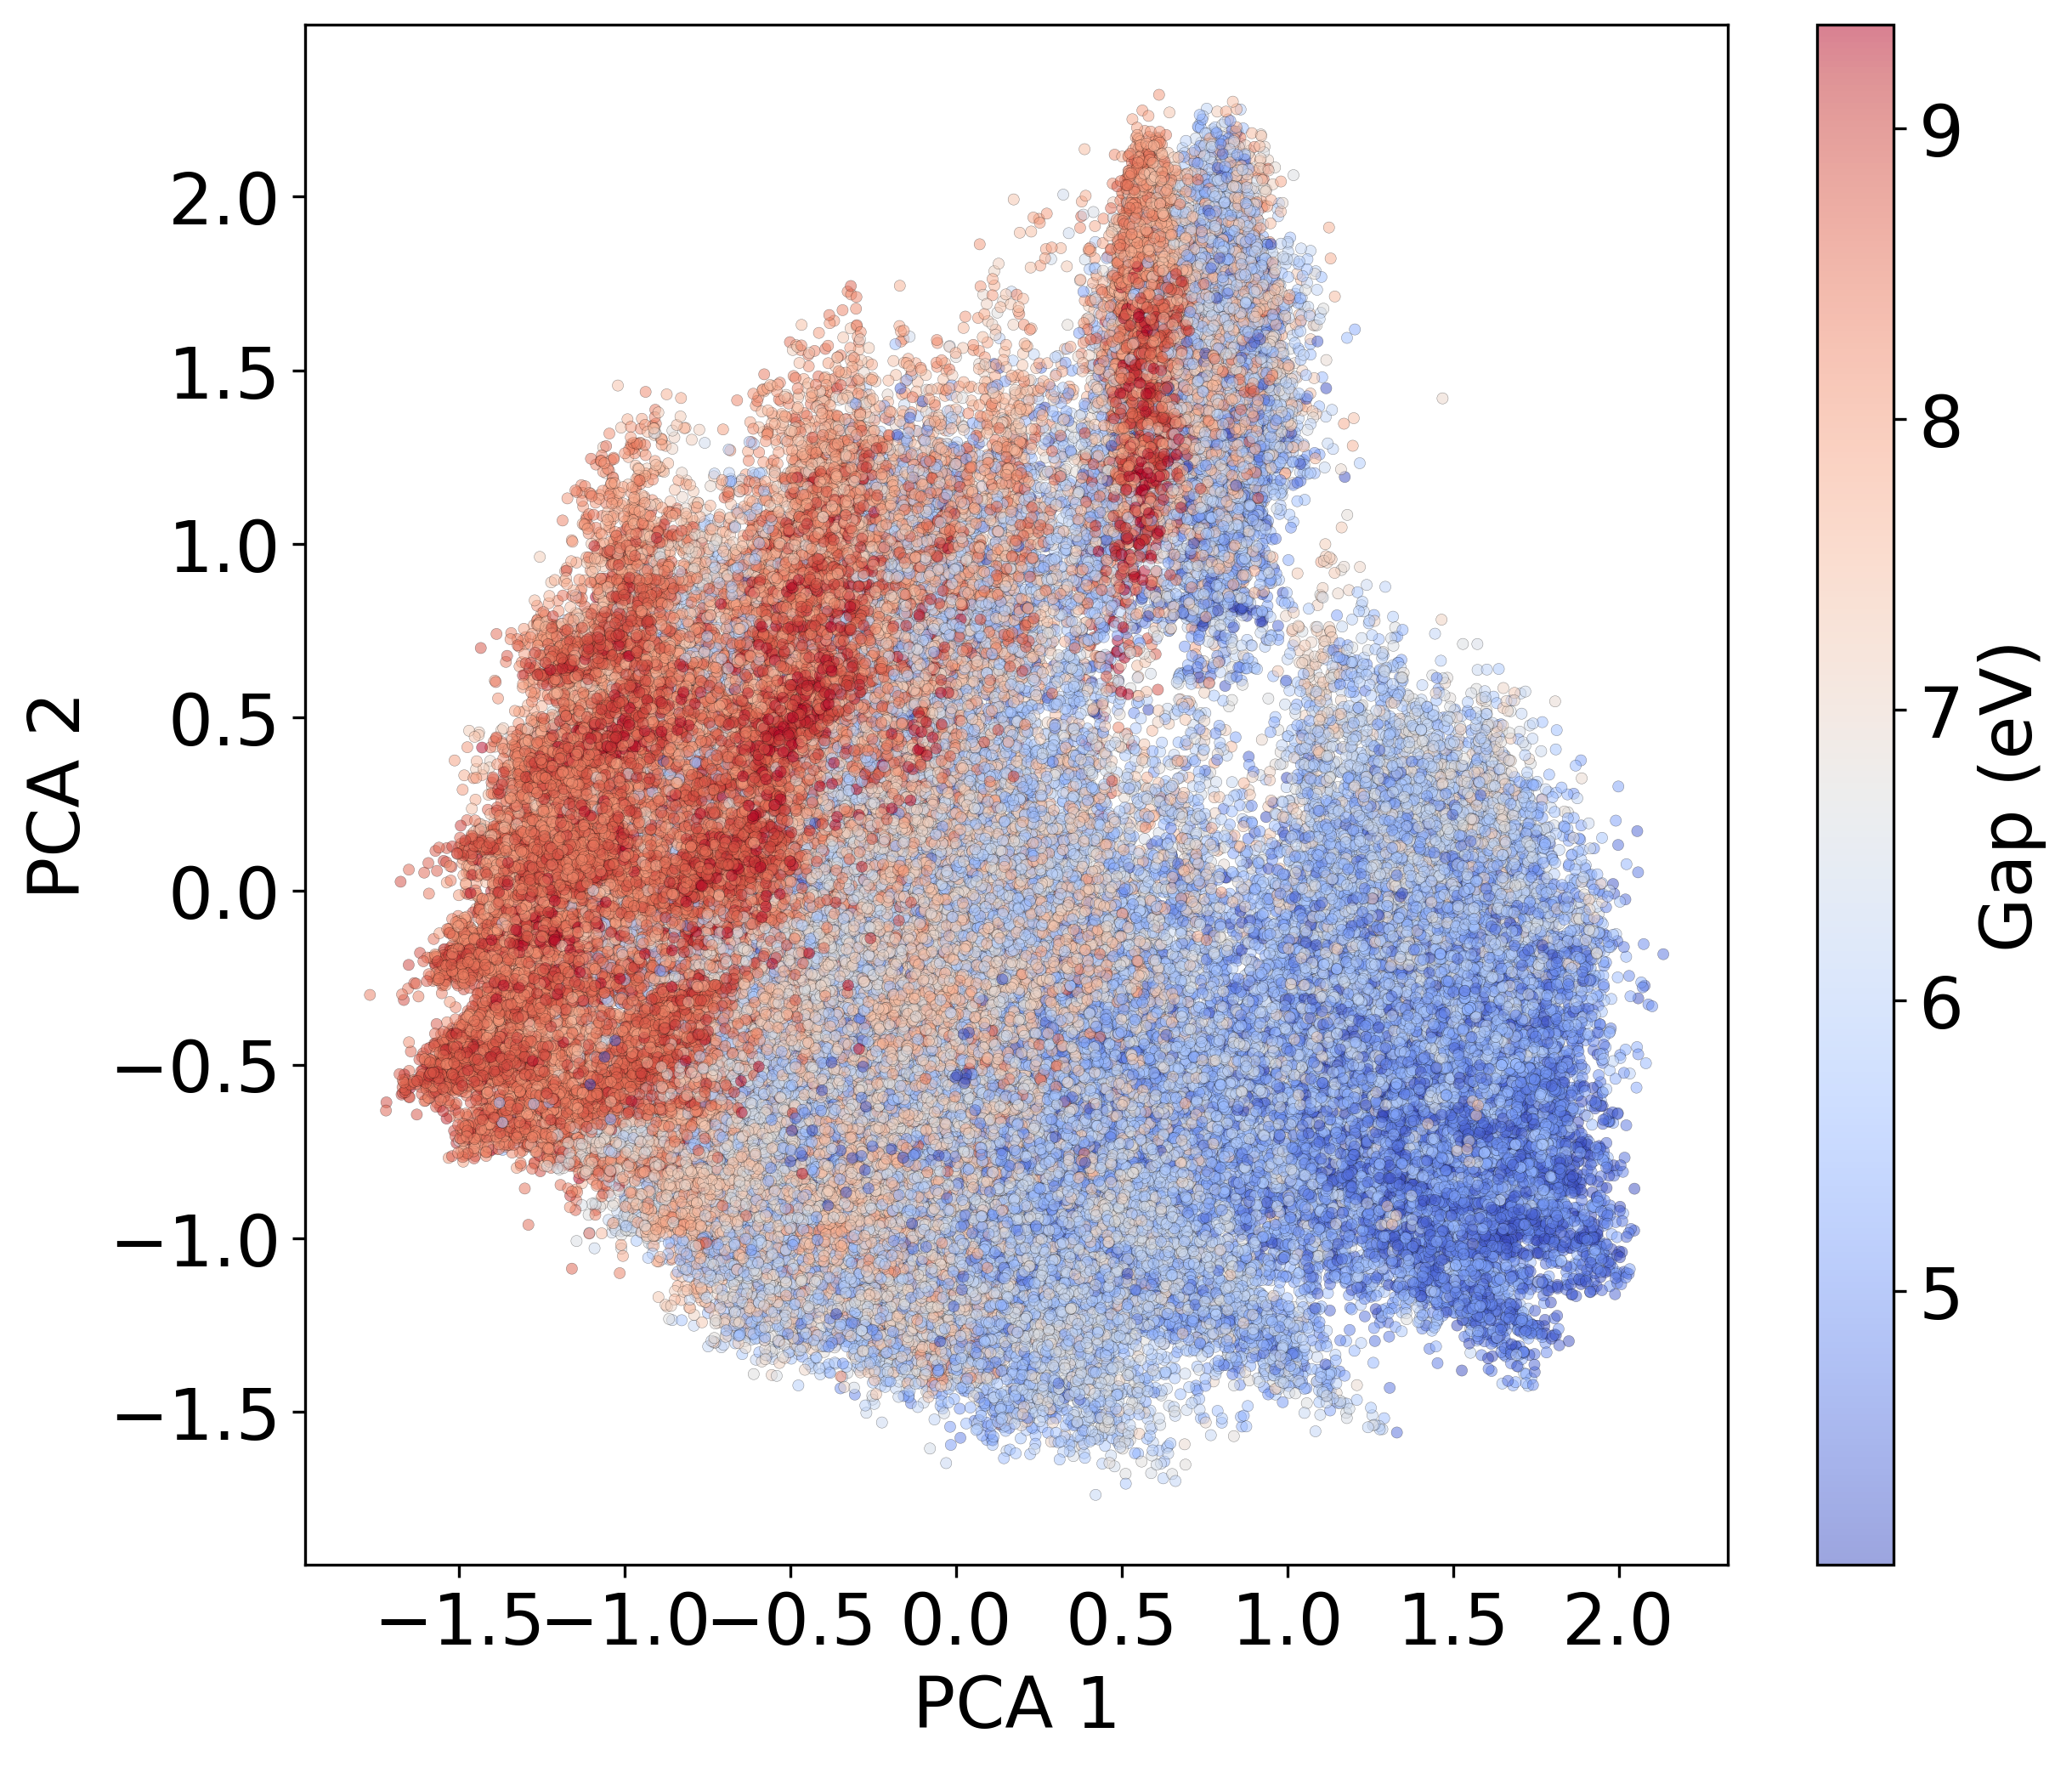

In [5]:
fig = plt.figure(figsize=(9,8), dpi=300)
plt.scatter(feat['PCA 1'], feat['PCA 2'], 
            c=feat['gap'], 
            marker='o', s=10, label='BE', cmap='coolwarm', linewidth=0.1, edgecolors='black', alpha=0.5,
            # norm=LogNorm(),
            vmin=np.quantile(feat['gap'], 0.01), vmax=np.quantile(feat['gap'], 0.99),
            )
cb = plt.colorbar()
cb.set_label(label='Gap (eV)', size=20)
cb.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('PCA 1', fontsize=20)
plt.ylabel('PCA 2', fontsize=20)

plt.show()

In [12]:
# mask out bottom 20% of gaps
percentile = 0.2
feat_masked = feat[feat['gap'] > np.quantile(feat['gap'], percentile)]
feat_masked

smiles  bit0  bit1  bit2  bit3  bit4  bit5  bit6  bit7  \
0                         C     0     0     0     0     0     0     0     0   
1                         N     0     0     0     0     0     0     0     0   
2                         O     0     0     0     0     0     0     0     0   
3                       C#C     0     0     0     0     0     0     0     0   
4                       C#N     0     0     0     0     0     0     0     0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
133880  C1C2C3C4C5OC14C5N23     0     0     0     0     0     0     0     0   
133881  C1N2C3C2C2C4OC12C34     0     0     0     0     0     1     0     0   
133882  C1N2C3C4C5C2C13CN45     0     0     0     0     0     1     0     0   
133883  C1N2C3C4C5CC13C2C45     0     0     0     0     0     1     0     0   
133884  C1N2C3C4C5OC13C2C45     0     0     0     0     0     1     0     0   

        bit8  ...        u298        h298        g298      cv      u0_atom  \
0          0  ...  -40.476062  -40.475117  -40.498597   6.469  -395.999595   
1          0  ...  -56.523026  -56.522082  -56.544961   6.316  -276.861363   
2          0  ...  -76.401867  -76.400922  -76.422349   6.002  -213.087624   
3          0  ...  -77.305527  -77.304583  -77.327429   8.574  -385.501997   
4          0  ...  -93.409370  -93.408425  -93.431246   6.278  -301.820534   
...      ...  ...         ...         ...         ...     ...          ...   
133880     0  ... -400.628599 -400.627654 -400.663098  23.658 -1603.983913   
133881     0  ... -400.624444 -400.623500 -400.658942  23.697 -1601.376613   
133882     0  ... -380.748619 -380.747675 -380.783148  23.972 -1667.045429   
133883     0  ... -364.714974 -364.714030 -364.749650  24.796 -1794.600439   
133884     0  ... -400.627892 -400.626948 -400.662186  23.434 -1603.471865   

          u298_atom    h298_atom    g298_atom     PCA 1     PCA 2  
0       -398.643290  -401.014647  -372.471772  0.401243  0.180240  
1       -278.620271  -280.399259  -259.338802  0.401294  0.180874  
2       -213.974294  -215.159658  -201.407171  0.389857  0.322405  
3       -387.237686  -389.016047  -365.800724  0.404938  0.279868  
4       -302.906752  -304.091489  -288.720028  0.418109  0.406899  
...             ...          ...          ...       ...       ...  
133880 -1614.898804 -1623.788097 -1492.819438 -1.209257 -0.344105  
133881 -1612.291504 -1621.181424 -1490.211511 -1.042036 -0.549316  
133882 -1678.830048 -1688.312964 -1549.143391 -0.779673 -0.276082  
133883 -1807.210860 -1817.286772 -1670.349892 -0.976415 -0.314388  
133884 -1614.455155 -1623.345075 -1492.247150 -1.013877 -0.587303  

[107059 rows x 2070 columns]

In [33]:
# random splits
n_seeds = 10
n_samples = [5, 10, 20, 50, 100, 200]
for n_sample in n_samples:
    for seed in range(n_seeds):
        feat_masked.sample(n_sample, random_state=seed).to_csv(f'data/splits/random/warmup_n{n_sample}_s{seed}.csv', index=False)